In [41]:
import os
from glob import glob
import matplotlib.pyplot as plt



# use a for loop to iterate through all subdirectories
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [18]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [19]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(244,244),
                                              batch_size=32,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(244,244),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#Creatre a model

model = Sequential([
    Conv2D(10,3, input_shape=(244,244,3)),
    Activation(activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])


model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
             )

In [28]:
#fit model

history = model.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data)
                   )

Epoch 1/5
235/235 [==============================] - 167s 710ms/step - loss: 2.1056 - accuracy: 0.2355 - val_loss: 1.9980 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 146s 619ms/step - loss: 1.8736 - accuracy: 0.3517 - val_loss: 1.9058 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 129s 550ms/step - loss: 1.4751 - accuracy: 0.5069 - val_loss: 2.0354 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 132s 563ms/step - loss: 0.9090 - accuracy: 0.7024 - val_loss: 2.5459 - val_accuracy: 0.2752
Epoch 5/5
235/235 [==============================] - 132s 561ms/step - loss: 0.3981 - accuracy: 0.8765 - val_loss: 3.2335 - val_accuracy: 0.2880


In [29]:
#Evaluate the model

model.evaluate(test_data)

79/79 [==============================] - 11s 144ms/step - loss: 3.2335 - accuracy: 0.2880


[3.233468770980835, 0.2879999876022339]

In [44]:
def plot_loss_curves(history):
    loss=history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend();

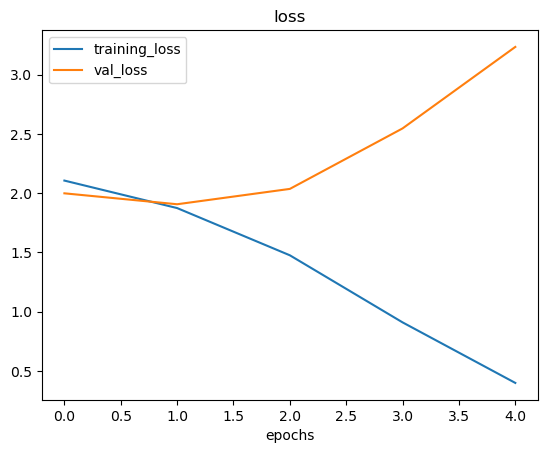

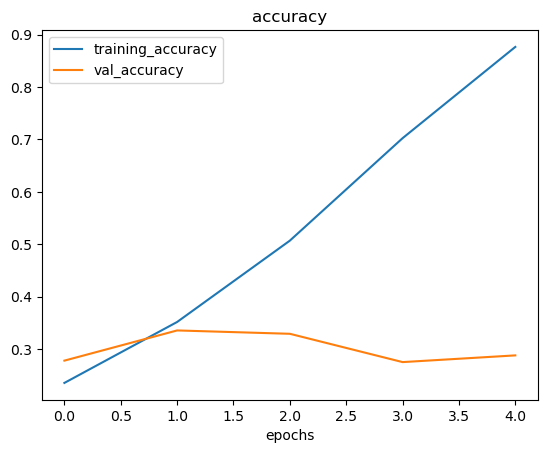

In [45]:
plot_loss_curves(history)

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 242, 242, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 120, 120, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 118, 118, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 116, 116, 10)      910       
                                                      

In [56]:
#improve model
model_1 = Sequential([
    Conv2D(10,3, input_shape=(244,244,3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])


model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
             )

In [57]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 activation_3 (Activation)   (None, 242, 242, 10)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 121, 121, 10)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 59, 59, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 34810)            

In [58]:
history_1 = model_1.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data)
                   )

Epoch 1/5
235/235 [==============================] - 99s 418ms/step - loss: 2.1335 - accuracy: 0.2252 - val_loss: 1.9767 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 57s 242ms/step - loss: 1.7188 - accuracy: 0.4277 - val_loss: 2.0230 - val_accuracy: 0.2972
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 1.1431 - accuracy: 0.6359 - val_loss: 2.1281 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 60s 257ms/step - loss: 0.5684 - accuracy: 0.8377 - val_loss: 2.6237 - val_accuracy: 0.2872
Epoch 5/5
235/235 [==============================] - 61s 258ms/step - loss: 0.2322 - accuracy: 0.9456 - val_loss: 3.2482 - val_accuracy: 0.2832


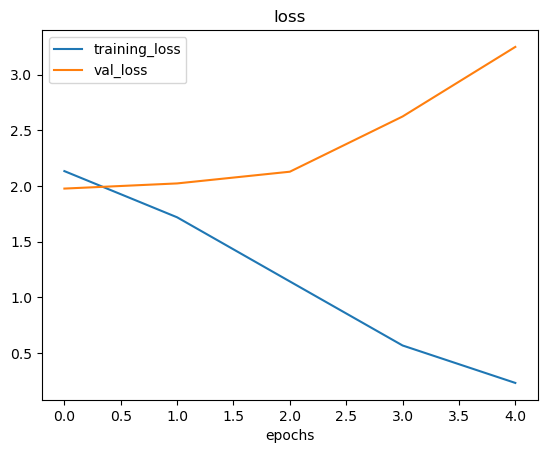

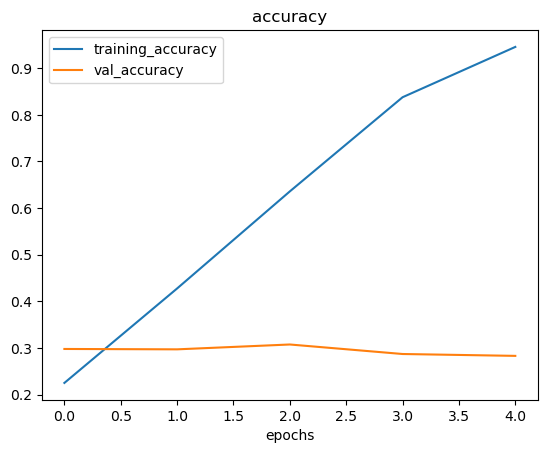

In [59]:
plot_loss_curves(history_1)

In [61]:
#Data Augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True
                                            )
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size=(244,244),
                                                                     batch_size=32,
                                                                     class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [65]:
model_2 = tf.keras.models.clone_model(model)


model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
             )

In [66]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 242, 242, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 120, 120, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 118, 118, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 116, 116, 10)      910       
                                                      

In [68]:
history_2 = model_2.fit(train_datagen_augmented,
                   epochs=5,
                   steps_per_epoch=len(train_datagen_augmented),
                   validation_data=test_data,
                   validation_steps=len(test_data)
                   )

Epoch 1/5
235/235 [==============================] - 147s 624ms/step - loss: 2.1037 - accuracy: 0.2397 - val_loss: 1.9310 - val_accuracy: 0.3312
Epoch 2/5
235/235 [==============================] - 135s 572ms/step - loss: 2.0180 - accuracy: 0.2915 - val_loss: 1.9330 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 143s 609ms/step - loss: 1.9686 - accuracy: 0.3099 - val_loss: 1.8059 - val_accuracy: 0.3904
Epoch 4/5
235/235 [==============================] - 147s 622ms/step - loss: 1.9325 - accuracy: 0.3259 - val_loss: 1.7660 - val_accuracy: 0.4024
Epoch 5/5
235/235 [==============================] - 149s 632ms/step - loss: 1.8821 - accuracy: 0.3495 - val_loss: 1.7784 - val_accuracy: 0.3932


In [69]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 1.7784 - accuracy: 0.3932


[1.7784476280212402, 0.39320001006126404]

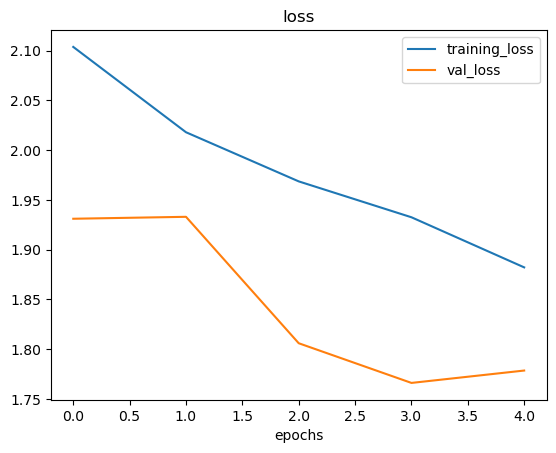

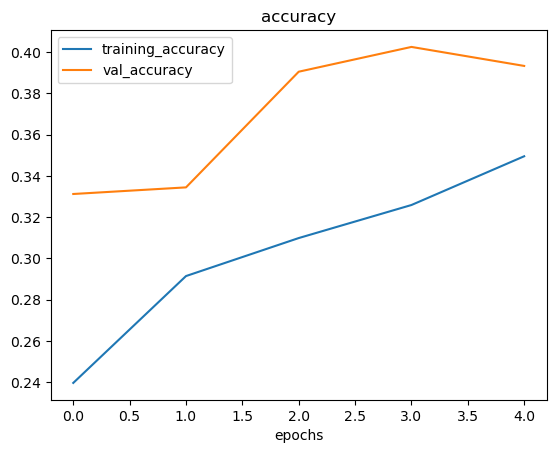

In [70]:
plot_loss_curves(history_2)

In [76]:
def load_and_prep_image(filename, img_shape=244):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [81]:
def pred_and_plot(model, filename, class_names=class_names):
    
    img=load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    if len(pred[0]) >1:
        pred_class = class_names[int(tf.argmax(pred[0]))]
    else: 
        pred_class = class_names[int(tf.round(pred[0]))]
        
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 21ms/step


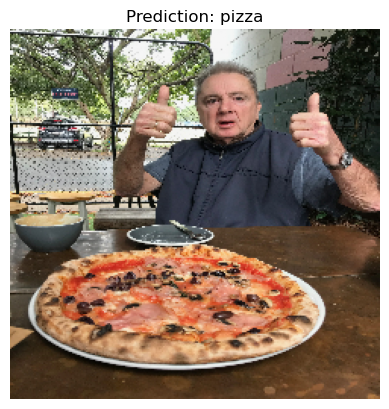

In [87]:
pred_and_plot(model=model_2,
              filename="Sample_data/03-pizza-dad.jpeg",
              class_names=class_names)

In [88]:
model_2.save("model_2_trained")

INFO:tensorflow:Assets written to: model_2_trained\assets


INFO:tensorflow:Assets written to: model_2_trained\assets


In [89]:
loaded_model_2 = tf.keras.models.load_model("model_2_trained")
loaded_model_2.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.7784 - accuracy: 0.3932


[1.7784476280212402, 0.39320001006126404]

In [90]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.7784 - accuracy: 0.3932


[1.7784475088119507, 0.39320001006126404]